In [64]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

Test data: torch.Size([1920, 784])
Img class: 1.0


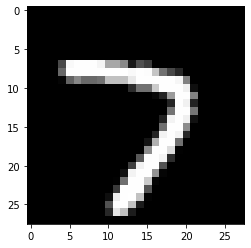

Aproach for 5 and 7: 99.21875
Test data: torch.Size([2060, 784])
Img class: 1.0


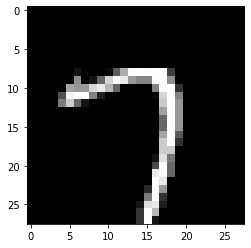

Aproach for 2 and 7: 98.05825242718447
Test data: torch.Size([2167, 784])
Img class: -1.0


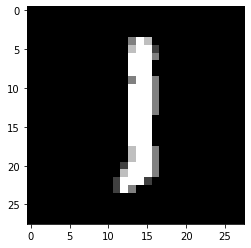

Aproach for 1 and 2: 99.21550530687587
Test data: torch.Size([2145, 784])
Img class: 1.0


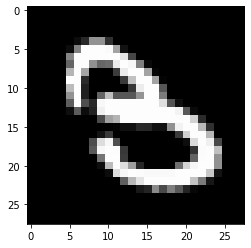

Aproach for 1 and 3: 99.44055944055944


In [84]:
def train(x,y,n_epochs,learning_rate):
    theta = torch.zeros(784,1)
    for epoch in range(n_epochs):
        denominator = 1 + torch.exp(y*(x @ theta))
        numerator = y * x
        gradient = -torch.mean(numerator/denominator,axis=0, keepdim=True).T
        theta = theta - learning_rate* gradient
    return theta

def filteringdata(num1, num2):
  # Loading and Filtering the dataset for training
  train_dataset = datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
  idx = (train_dataset.targets==num1) | (train_dataset.targets==num2)
  train_dataset.targets = train_dataset.targets[idx]
  train_dataset.data = train_dataset.data[idx]

  # Loading and Filtering the dataset for test
  test_dataset = datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())
  indx = (test_dataset.targets==num1) | (test_dataset.targets==num2)
  test_dataset.targets = test_dataset.targets[indx]
  test_dataset.data = test_dataset.data[indx]
  test_dataset.data.shape 
  
  n_training_samples = train_dataset.data.shape[0]
  learning_rate = 1e-4 #Setting the learning rate


  train_data = train_dataset.data.view(n_training_samples, -1) #Arranging in 28x28 vectors
  train_targets = train_dataset.targets.view(n_training_samples, -1)
  y_train = train_targets.float()
  x_train = train_data.float()

  y_train[y_train==num1] = -1
  y_train[y_train==num2] = 1

  n_test_samples = test_dataset.data.shape[0]
  test_data = test_dataset.data.view(n_test_samples, -1)
  test_targets = test_dataset.targets.view(n_test_samples, -1)

  y_test = test_targets.float()
  x_test = test_data.float()

  y_test[y_test==num1] = -1
  y_test[y_test==num2] = 1
  import matplotlib.pyplot as plt

  print('Test data:', x_test.shape)
  print('Img class:', y_test[3].item())
  img = test_data[3].view(28, 28)
  plt.imshow(img, cmap='gray')
  plt.show()

  theta = train(x_train,y_train,100,learning_rate)

  # y_hat = 1/(1+torch.exp(-x_test@theta))
  y_hat = torch.sigmoid(x_test@theta)

  y_hat[y_hat < 0.5] = -1
  y_hat[y_hat >= 0.5] = 1

  correto = 0

  for i in range(y_hat.shape[0]):
    if(y_hat[i] == y_test[i]):
      correto += 1
  accuracy = 100 * correto/y_hat.shape[0]
  accuracy
  print("Aproach for {} and {}:".format(num1, num2), accuracy )

filteringdata(5,7)
filteringdata(2,7)
filteringdata(1,2)
filteringdata(1,3)

O par de valores que teve maior aproximação foi (1,3) com 99,4%